# Textmining - wired

---

Group name: Group B

---


# Setup

In [3]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

In [4]:
# we suppress some unimportant warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Data

### Data Import

In [1]:
import pandas as pd

# Import Tweets of data frame of Company fivethirtyeight
df_wired = pd.read_csv("../data/raw/twitter-WIRED.csv")

# drop some columns
df_wired.drop(columns=["author_id", "edit_history_tweet_ids", "id"], inplace=True)

df_wired.head(3)

,Unnamed: 0,created_at,text
0,0,2022-11-15T14:26:03.000Z,WIRED\r\nEasy to set up. Snappy interface. Gre...
1,1,2022-11-15T14:06:05.000Z,"Larp, short for live action role playing, migh..."
2,2,2022-11-15T13:36:02.000Z,WIRED’s editor in chief Gideon Lichfield mulls...


### Data corrections

In [2]:
df_wired['text'] = df_wired['text'].astype(str).str.lower()

df_wired.head(3)

,Unnamed: 0,created_at,text
0,0,2022-11-15T14:26:03.000Z,wired\r\neasy to set up. snappy interface. gre...
1,1,2022-11-15T14:06:05.000Z,"larp, short for live action role playing, migh..."
2,2,2022-11-15T13:36:02.000Z,wired’s editor in chief gideon lichfield mulls...


In [3]:
df_wired['created_at'] = pd.to_datetime(df_wired['created_at'])

df_wired.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  100 non-null    int64              
 1   created_at  100 non-null    datetime64[ns, UTC]
 2   text        100 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 2.5+ KB


## Text mining data preparation

In [4]:
from nltk.tokenize import RegexpTokenizer

In [5]:
regexp = RegexpTokenizer('\w+')
df_wired['text_token']=df_wired['text'].apply(regexp.tokenize)

In [6]:
df_wired.head()

,Unnamed: 0,created_at,text,text_token
0,0,2022-11-15 14:26:03+00:00,wired\r\neasy to set up. snappy interface. gre...,"[wired, easy, to, set, up, snappy, interface, ..."
1,1,2022-11-15 14:06:05+00:00,"larp, short for live action role playing, migh...","[larp, short, for, live, action, role, playing..."
2,2,2022-11-15 13:36:02+00:00,wired’s editor in chief gideon lichfield mulls...,"[wired, s, editor, in, chief, gideon, lichfiel..."
3,3,2022-11-15 13:01:01+00:00,can you guess what this is? this unbelievable ...,"[can, you, guess, what, this, is, this, unbeli..."
4,4,2022-11-15 12:05:27+00:00,europe’s cities are growing denser once more—a...,"[europe, s, cities, are, growing, denser, once..."


In [7]:
# Check your code
assert df_wired.iloc[0, 2] == ['politics',
 'podcast',
 'why',
 'democrats',
 'beat',
 'historical',
 'trends',
 'in']

AssertionError: 

### Stopwords

In [8]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
from nltk.corpus import stopwords

In [10]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [11]:
# make your own custom stopwords
my_stopwords = ['https', 'co']

In [12]:
# Extend the stopword list with your own custom stopwords
stopwords.extend(my_stopwords)

In [13]:
df_wired['text_token_s'] = df_wired['text_token'].apply(lambda x: [i for i in x if i not in stopwords])

In [14]:
# Check your code
assert df_wired.iloc[1,3] == ['uk',
 'prime',
 'minister',
 'liz',
 'truss',
 'quits',
 'disastrous',
 'six',
 'weeks',
 'office',
 'putting',
 'course',
 'britain',
 'shortest',
 'serving',
 'leader',
 '0o0xqscrxi']

AssertionError: 

In [15]:
df_wired.head(3)

,Unnamed: 0,created_at,text,text_token,text_token_s
0,0,2022-11-15 14:26:03+00:00,wired\r\neasy to set up. snappy interface. gre...,"[wired, easy, to, set, up, snappy, interface, ...","[wired, easy, set, snappy, interface, great, r..."
1,1,2022-11-15 14:06:05+00:00,"larp, short for live action role playing, migh...","[larp, short, for, live, action, role, playing...","[larp, short, live, action, role, playing, mig..."
2,2,2022-11-15 13:36:02+00:00,wired’s editor in chief gideon lichfield mulls...,"[wired, s, editor, in, chief, gideon, lichfiel...","[wired, editor, chief, gideon, lichfield, mull..."


### Transform data and remove infrequent words

In [17]:
df_wired['text_si'] = df_wired['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

In [18]:
# check you code
assert df_wired.iloc[1, 4] == 'prime minister liz truss quits disastrous six weeks office putting course britain shortest serving leader 0o0xqscrxi'

AssertionError: 

In [19]:
df_wired.head(3)

,Unnamed: 0,created_at,text,text_token,text_token_s,text_si
0,0,2022-11-15 14:26:03+00:00,wired\r\neasy to set up. snappy interface. gre...,"[wired, easy, to, set, up, snappy, interface, ...","[wired, easy, set, snappy, interface, great, r...",wired easy set snappy interface great remote s...
1,1,2022-11-15 14:06:05+00:00,"larp, short for live action role playing, migh...","[larp, short, for, live, action, role, playing...","[larp, short, live, action, role, playing, mig...",larp short live action role playing might soun...
2,2,2022-11-15 13:36:02+00:00,wired’s editor in chief gideon lichfield mulls...,"[wired, s, editor, in, chief, gideon, lichfiel...","[wired, editor, chief, gideon, lichfield, mull...",wired editor chief gideon lichfield mulls lies...


### Lemmatization

In [20]:
# we need to download some packages
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\carmi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
# create an object called wordnet_lem of the WordNetLemmatizer() function.
wordnet_lem = WordNetLemmatizer()

In [23]:
# create a new column called text_sil (l for lemmatization) and apply the function .lemmatize
df_wired['text_sil'] = df_wired['text_si'].apply(wordnet_lem.lemmatize)

In [24]:
# we check wether there are any differences in the two columns
check_difference = (df_wired['text_sil'] == df_wired['text_si'])

# sum all True and False values
check_difference.value_counts()

True    100
dtype: int64

In [25]:
df_wired.to_csv("sentiment-cnn.csv", index=None)

## Data visualization

In [26]:
# combine all words in one object called all_words
all_words = ' '.join([i for i in df_wired['text_sil']])

In [27]:
all_words

'wired easy set snappy interface great remote supports nearly every streaming service pair two pairs airpods quiet viewing tired pricier peers great apple ecosystem u9ef0ieji4 larp short live action role playing might sound like fun power transform people real lives kecba3mkg9 wired editor chief gideon lichfield mulls lies store elon musk sam bankman fried plus thoughts past week headlines cppftwoidi guess unbelievable photo actually unburned particles carbon released hydrocarbon chain candle wax breaks placed top year small world photomicrography competition ole bielfeldt cflwofwgwk europe cities growing denser providing potential boon environment well process american cities take note via wireduk snonaib9a1 stressful time year favor buy holiday gifts early tricked ebike speakers sound like dream presents need supercharge holidays ugte8z4wfx part a_greenberg series team uses secret technique locate alphabay server operation heats agents unexpected run target j80mga7n8q dive 2023 predi

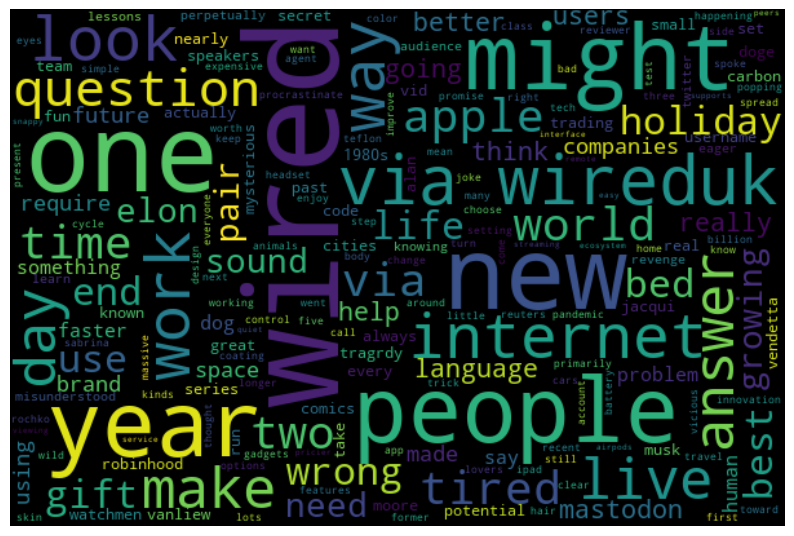

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

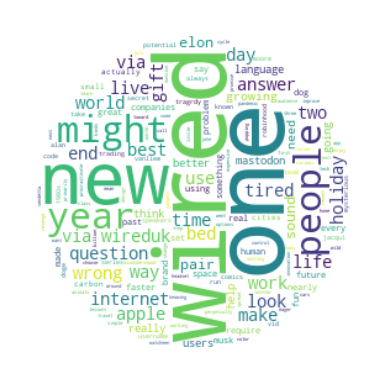

In [29]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [30]:
# download the package
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [32]:
# tokenize the words
words_tokens = nltk.word_tokenize(all_words)

In [33]:
# use the function FreqDist and save the result as fd
fd = FreqDist(words_tokens)

In [34]:
fd

FreqDist({'wired': 15, 'via': 11, 'new': 9, 'like': 8, '2021': 8, 'one': 8, 'might': 7, 'people': 7, 'wireduk': 7, 'get': 7, ...})

### Most common words

In [35]:
# find the 3 most common words
top_3 = fd.most_common(n=3)

top_3

[('wired', 15), ('via', 11), ('new', 9)]

In [36]:
# Check your code
assert top_3 == [('wired', 15), ('via', 11), ('new', 9)]

In [37]:
# show the 3 most common words as table
fd.tabulate(3)

wired   via   new 
   15    11     9 


### Plot common words

In [38]:
# Obtain top 10 words
top_10 = fd.most_common(10)

top_10

[('wired', 15),
 ('via', 11),
 ('new', 9),
 ('like', 8),
 ('2021', 8),
 ('one', 8),
 ('might', 7),
 ('people', 7),
 ('wireduk', 7),
 ('get', 7)]

In [39]:
# make a pandas datframe from the dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
2021,8
get,7
like,8
might,7
new,9
one,8
people,7
via,11
wired,15
wireduk,7


In [40]:
# reset index to transform index to column
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,2021,8
1,get,7
2,like,8
3,might,7
4,new,9
5,one,8
6,people,7
7,via,11
8,wired,15
9,wireduk,7


In [41]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

c:\Users\carmi\anaconda3\envs\nlp\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

### Search specific words

In [42]:
# Show frequency of a specific word
fd["people"]

7